<a href="https://colab.research.google.com/github/icygit6/image-processing/blob/main/lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/skimage/transform/radon_transform.py:74: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn(


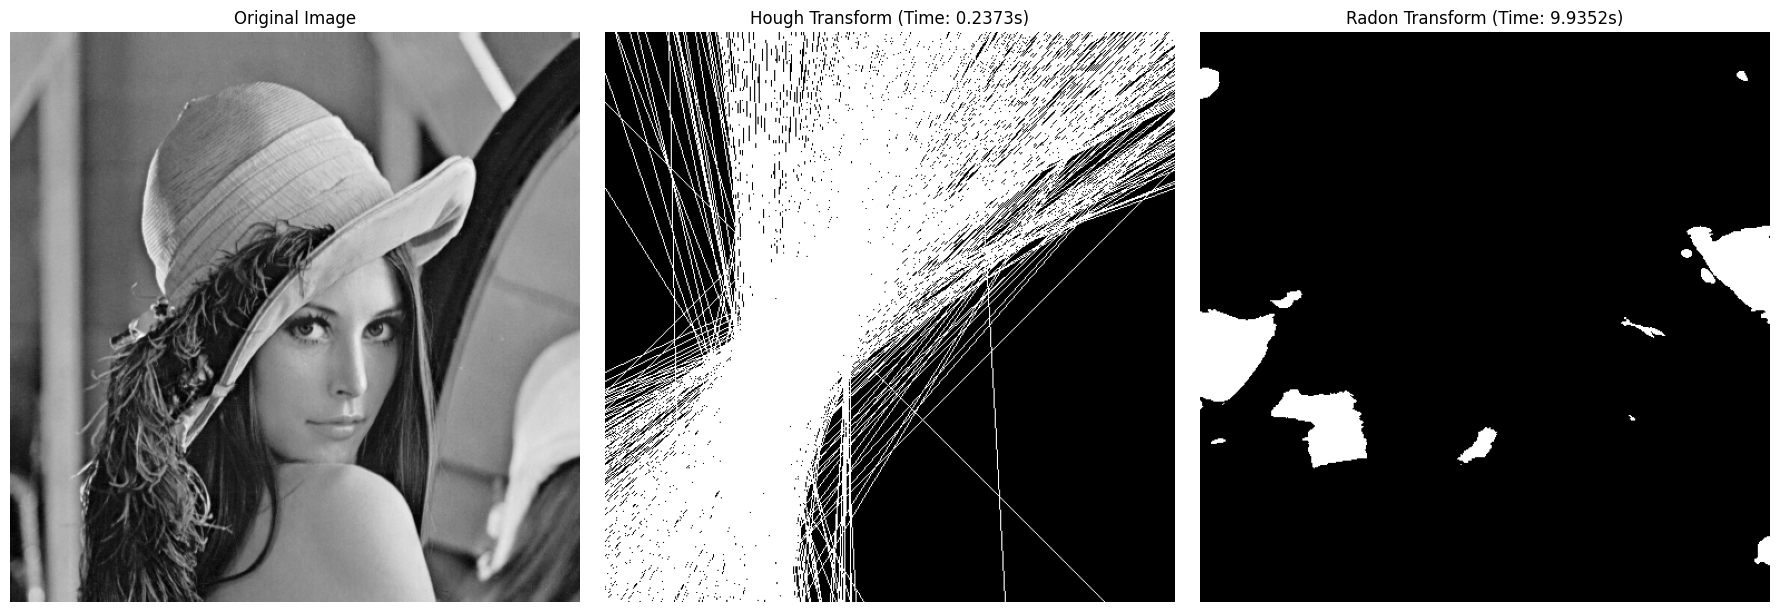

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import radon
import time

# Load the Lena image in grayscale
image = cv2.imread("/content/drive/MyDrive/python/IMAGE PROCESSING/lena.png", cv2.IMREAD_GRAYSCALE)
if image is None:
    raise FileNotFoundError("Image not found. Please check the file path.")
def hough_transform(image, threshold=100):
    """Detect lines using Hough Transform."""
    edges = cv2.Canny(image, 50, 150, apertureSize=3)
    lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold)

    # Draw the detected lines on a blank image
    hough_result = np.zeros_like(image)
    if lines is not None:
        for rho, theta in lines[:, 0]:
            a, b = np.cos(theta), np.sin(theta)
            x0, y0 = a * rho, b * rho
            x1, y1 = int(x0 + 1000 * (-b)), int(y0 + 1000 * (a))
            x2, y2 = int(x0 - 1000 * (-b)), int(y0 - 1000 * (a))
            cv2.line(hough_result, (x1, y1), (x2, y2), 255, 1)
    return hough_result

start_hough = time.time()
hough_result = hough_transform(image)
end_hough = time.time()
time_hough = end_hough - start_hough
def radon_transform(image):
    """Detect lines using Radon Transform."""
    # Normalize the image for Radon Transform
    image_normalized = image / 255.0
    theta = np.linspace(0., 180., max(image.shape), endpoint=False)
    sinogram = radon(image_normalized, theta=theta, circle=True)

    # Threshold the Radon transform to highlight prominent lines
    radon_result = (sinogram > np.percentile(sinogram, 95)).astype(np.uint8) * 255
    return radon_result

start_radon = time.time()
radon_result = radon_transform(image)
end_radon = time.time()
time_radon = end_radon - start_radon
# Display results
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title(f"Hough Transform (Time: {time_hough:.4f}s)")
plt.imshow(hough_result, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title(f"Radon Transform (Time: {time_radon:.4f}s)")
plt.imshow(radon_result, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


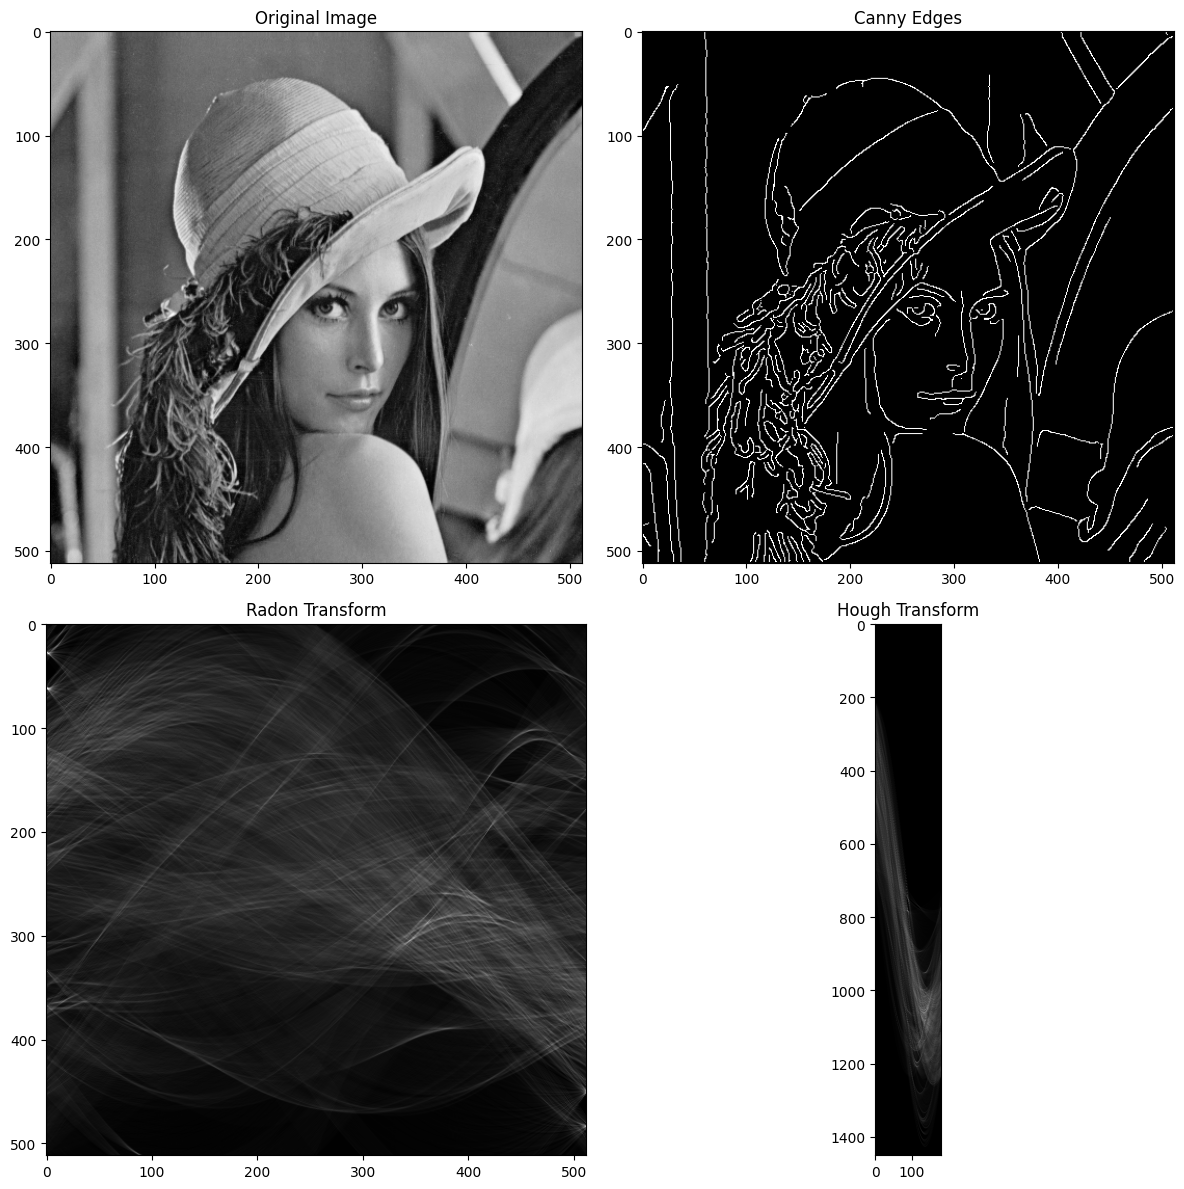

Hough Transform Execution Time: 0.0088 seconds
Radon Transform Execution Time: 4.2514 seconds


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, feature, transform, color
from skimage.transform import radon
import time
path = "/content/drive/MyDrive/python/IMAGE PROCESSING/lena.png"
ori = io.imread(path, as_gray=True)
edges = feature.canny(ori, sigma=2)
def hough(edges):
    start = time.time()
    houghs, angles, dists = transform.hough_line(edges)
    etime = time.time() - start
    return houghs, angles, dists, etime
def radonf(image):
    start = time.time()
    theta = np.linspace(0., 180., max(image.shape), endpoint=False)
    sinogram = radon(image, theta = theta, circle=True)
    etime = time.time() - start
    return sinogram, etime
houghs, angles, dists, hought = hough(edges)
sinogram, radont = radonf(edges)
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes[0, 0].imshow(ori, cmap="gray")
axes[0, 0].set_title("Original Image")
axes[0, 1].imshow(edges, cmap="gray")
axes[0, 1].set_title("Canny Edges")
axes[1, 0].imshow(sinogram, cmap="gray", aspect="auto")
axes[1, 0].set_title("Radon Transform")
axes[1, 1].imshow(houghs, cmap="gray")
axes[1, 1].set_title("Hough Transform")
plt.tight_layout()
plt.show()
print(f"Hough Transform Execution Time: {hought:.4f} seconds")
print(f"Radon Transform Execution Time: {radont:.4f} seconds")

from  the ppt i got so confused becuase the ppt is stating the name rondon and i couldn't fins it online and i did some research that there is nothing named rondon , i did this task just as what the ppt showed me becuase i dont have enough reference and when i search online most of it also shows the result i am having now veen the one with lena, this is the best i can get so far .